<a href="https://colab.research.google.com/github/rudevico/Gachon-AISTUDY/blob/main/TensorFlow_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
tf.keras.layers.Conv2D(filters=10,
                       kernel_size=(3, 3),
                       strides=(1, 1),
                       padding='valid',
                       activation=None)

<Conv2D name=conv2d, built=False>

**cf. [tf.keras.layers.Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)**

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test) = \
    keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(f'X_train: Shape {X_train.shape} X_test: Shape {X_test.shape}')
print(f'y_train: Shape {y_train.shape} y_test: Shape {y_test.shape}')

X_train: Shape (60000, 28, 28) X_test: Shape (10000, 28, 28)
y_train: Shape (60000,) y_test: Shape (10000,)


In [6]:
# channel dim 추가. grayscale=1, color=3
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

In [7]:
print(X_train[:3])
print(y_train[:3])

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [8]:
# Define the one-hot encoding function
def one_hot_encoding(label_array):
    label_list = []
    for i in range(len(label_array)):
        label_list.append([0] * len(np.unique(label_array)))

    label_array_onehot = np.array(label_list)
    for j in range(len(label_list)):
        hot_idx = label_array[j]
        label_array_onehot[j][hot_idx] = 1

    return label_array_onehot

In [9]:
np.array([1, 2, 3])

array([1, 2, 3])

In [10]:
y_train_onehot = one_hot_encoding(y_train)
y_test_onehot = one_hot_encoding(y_test)

print(type(y_train_onehot))
print(y_train_onehot[:3])

<class 'numpy.ndarray'>
[[0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


In [11]:
# Create the model
model = keras.models.Sequential()

# Add layers
relu = keras.activations.relu
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                              activation=relu, padding='same',
                              input_shape=(28, 28, 1),
                              name='Conv2D_32Depth'))
model.add(keras.layers.MaxPooling2D(2,
                                    name='MaxPooling_2-1'))

model.add(keras.layers.Conv2D(filters=64, kernel_size=3,
                              activation=relu, padding='same',
                              name='Conv2D_64Depth'))
model.add(keras.layers.MaxPooling2D(2,
                                    name='MaxPooling_2-2'))

# Dense 통과 전에 flatten
model.add(keras.layers.Flatten(name='Flatten'))
model.add(keras.layers.Dense(units=100, activation=relu,
                             name='Dense100'))
model.add(keras.layers.Dropout(rate=0.4,
                               name='Dropout0.4'))
softmax = keras.activations.softmax
model.add(keras.layers.Dense(units=10, activation=softmax,
                             name='Output'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv2D_32Depth (Conv2D)              │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling_2-1 (MaxPooling2D)        │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_64Depth (Conv2D)              │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling_2-2 (MaxPooling2D)        │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense100 (Dense)                     │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout0.4 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

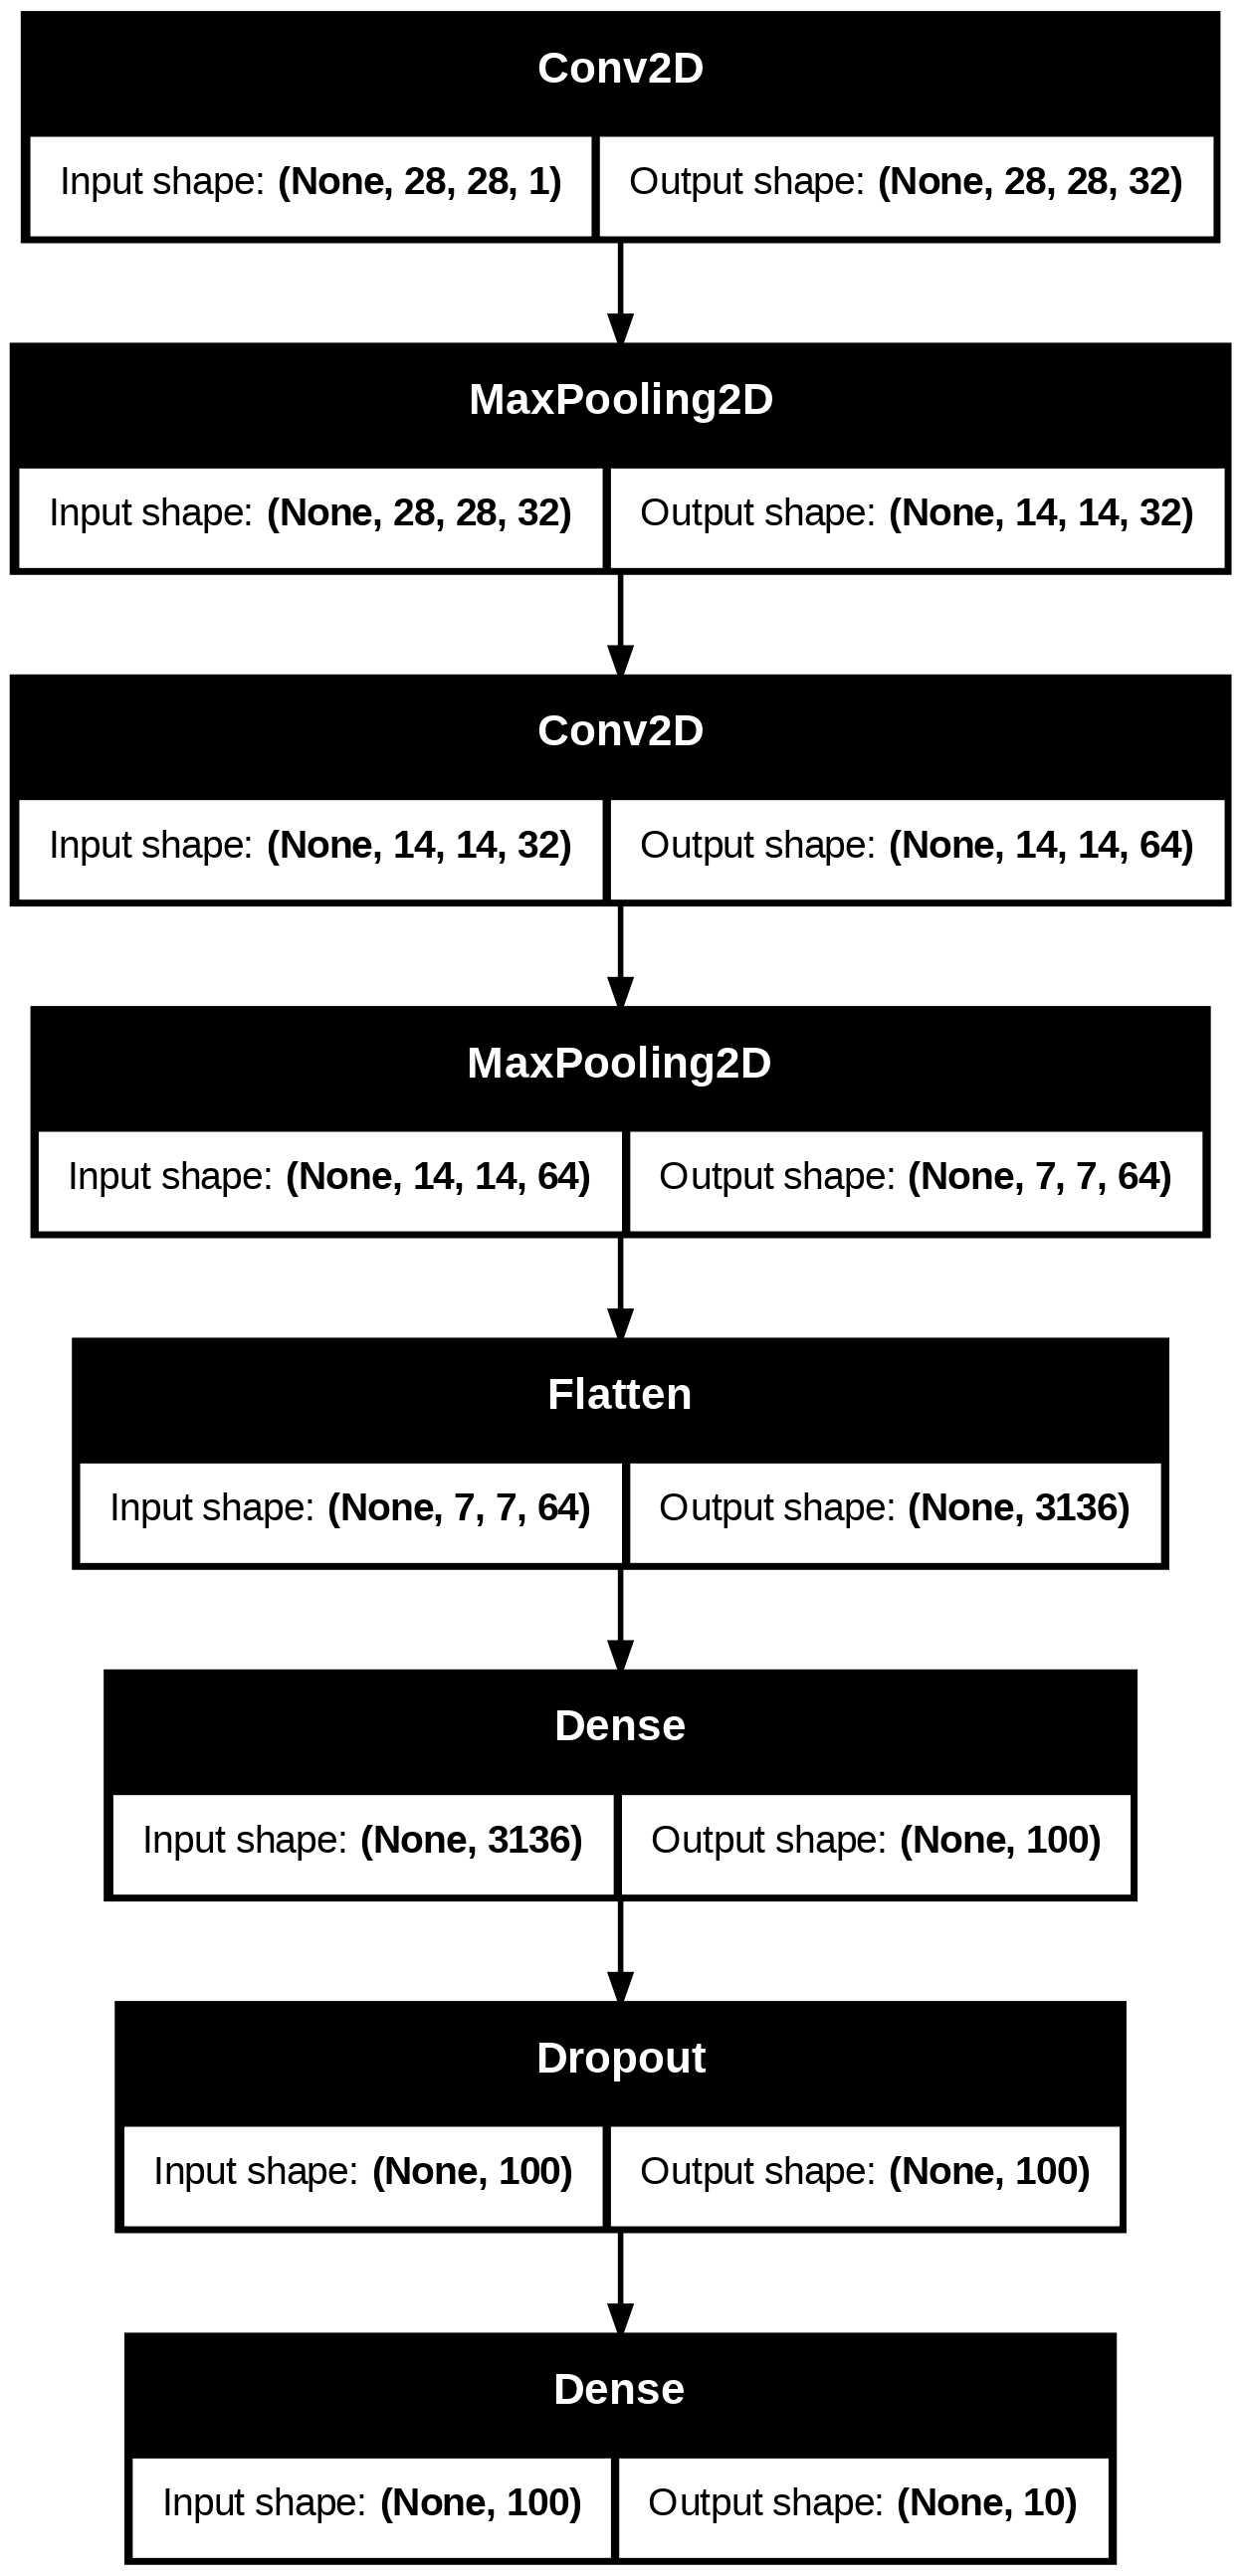

In [12]:
# layer structure를 그림으로 표현
# shape의 첫 element는 batch_size
keras.utils.plot_model(model, show_shapes=True)

# file로 export 가능
# keras.utils.plot_model(model, show_shapes=True,
#                        to_file='model.png')

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# colab에서는 .h5로 저장 안 되는 듯함
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train_onehot,
                    validation_split=0.2,
                    batch_size=None,
                    verbose=2,
                    epochs=20,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 - 7s - 5ms/step - accuracy: 0.9351 - loss: 0.1761 - val_accuracy: 0.9221 - val_loss: 0.2270
Epoch 2/20
1500/1500 - 4s - 2ms/step - accuracy: 0.9391 - loss: 0.1634 - val_accuracy: 0.9161 - val_loss: 0.2520
Epoch 3/20
1500/1500 - 5s - 3ms/step - accuracy: 0.9453 - loss: 0.1481 - val_accuracy: 0.9171 - val_loss: 0.2453


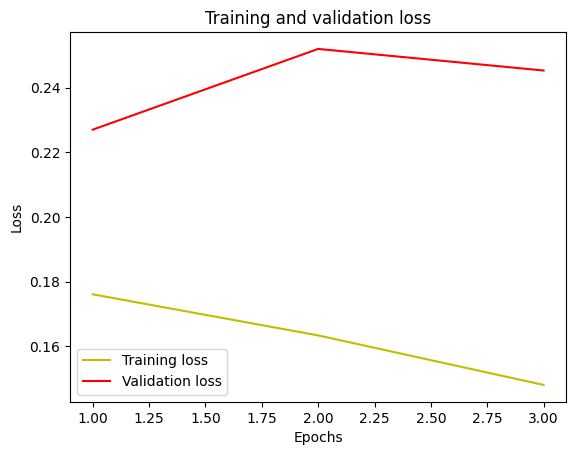

In [18]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
# 더 자세한 결과 확인
# model.compile()에서 'metrics'를 이용해서도 확인 가능할 것 같지만,
# 일단 배운대로만 진행함

from sklearn.metrics import classification_report, confusion_matrix

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

y_pred = model(X_test)
y_pred_probs = softmax(y_pred)
y_pred_class = np.argmax(y_pred_probs, axis=1)
y_test_class = np.argmax(y_test_onehot, axis=1)

print(classification_report(y_test_class, y_pred_class,
                            zero_division=0))
print(confusion_matrix(y_test_class, y_pred_class))

# label 0과 label 7을 서로 혼동하는 경우가 많은 것을 확인

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.89      0.85      0.87      1000
           3       0.92      0.92      0.92      1000
           4       0.84      0.90      0.87      1000
           5       0.99      0.99      0.99      1000
           6       0.76      0.74      0.75      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.99      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

[[869   0  13  10   3   1  96   0   8   0]
 [  1 985   0   9   2   0   2   0   1   0]
 [ 12   1 851   7  79   0  50   0   0   0]
 [ 14   4   9 917  20   0  35   0   1   0]
 [  1   0  33  21 900   0  44   0   1   0]
 [  0   0   0   0   0 990 

In [ ]:
'''cf.
precision   | TP / (TP + FP)
recall      | TP / (TP + FN)
f1-score    | harmonic mean of precision and recall
              (2 * (precision * recall)) / (precision + recall)
              일반적으로 precision과 recall은 trade-off 관계라서 이를 절충할 수 있도록 한 개념임
support     | 각 class의 sample count
accuracy    | (TP + TN) / (TP + TN + FP + FN)
macro avg   | arithmatic mean of precision(각 class들의 precision 평균)
'''

In [ ]:
'''cf.
TN  | True Negative(진음성)
FN  | False Negative(위음성)
FP  | False Positive(위양성)
TP  | True Positive(진양성)
'''